Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **18Sep21**

# Homework 02 (21Sep21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `Shubhojit`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (45 pts)](#a1) Function approximation with Wavelets basis functions at collocation points.
 - [1.1)](#a11)(5 pts) Generate the target function.
 - [1.2)](#a12)(20 pts) Compute parameters for a given error level.
 - [1.3)](#a13)(10 pts) Plot the residual function and analyze it.
 - [1.4)](#a14)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 2 (40 pts)](#a2) Function approximation with Wavelets basis functions.
 - [2.1)](#a21)(30 pts) Using the same basis functions, approximate the target function continuously ($m\rightarrow\infty$).
 - [2.2)](#a22)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (45 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following piecewise linear function on these shape points:</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.linalg import solve,norm
import math
from scipy.integrate import quad
from numpy.linalg import matrix_rank
plt.style.use('dark_background')

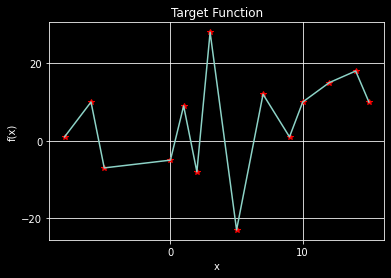

In [2]:
'''Generate the target function f'''
Shap_point=[(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)]
Shape= np.array(Shap_point)
#print(Shape[:,0])
x_min=Shape[:,0][0]
x_max=Shape[:,0][-1]

#plt.step(Shape[:,0], Shape[:,1], where='mid',label='mid')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red')
plt.plot(Shape[:,0], Shape[:,1])
plt.grid(True)
plt.title('Target Function')
plt.xlabel('x');plt.ylabel('f(x)')
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams.update({'font.size': 22})
plt.show()

### <span style="color:blue">[1.2)](#toa)(20 pts) Compute "the best" approximant function $g$ using Wavelet basis functions with adequate parameters to approximate $f$ with a relative $L_2$ norm below 30% error; use a small number of collocation points as you are able to. Report the number of packets, modes, and other parameters used, show a comparison plot, compute the $L_2$ norm relative error, and explain mathematically in what sense is your approximant the best.
</span><a id="a12"></a>

In [3]:
'''Build the basis functions'''

wavelength = x_max-x_min
K=2*(math.pi)/wavelength

shift = 0#.2

x_p= np.array([-2,2.5,12])
N = np.array([2,3,2])

sigma_p = [.5,.9,.5]

'''x_p= np.array([-4,3,10])
N = np.array([2,3,2])

sigma_p = [1, 0.5, 0.5]'''


def basis(x,x_p,shift,sigma_p,j):
    #Z_b=np.zeros((len(x),2*N+1))
    #for j in range((2*N+1)):
    if (j==0):
        Z_b=np.exp(-((x-x_p)**2)/2*sigma_p**2)
    elif (j%2)==1:
        Z_b=(np.exp(-((x-x_p)**2)/2*sigma_p**2))*((np.cos(((j//2)+1)*K*x)+(shift*(x**2)*0.5)))
    elif (j%2)==0:
        Z_b=(np.exp(-((x-x_p)**2)/2*sigma_p**2))*((np.sin(((j//2)+1)*K*x)+(shift*(x**2)*0.5)))
    return Z_b


P=len(N)

def handel_index(p):
    s0=0
    if p>=1:
        for i in range(p):
            s0=s0+(2*N[i]+1)
    return s0
        

def WB(x,N,x_p,shift,sigma_p):
    Z_M=np.zeros((len(x),2*N+1))
    for i in range (len(x)):
        for j in range((2*N+1)):
            if (j==0):
                Z_M[i,j]=np.exp(-((x[i]-x_p)**2)/2*sigma_p**2)
            elif (j%2)==1:
                Z_M[i,j]=(np.exp(-((x[i]-x_p)**2)/2*sigma_p**2))*((np.cos(((j//2)+1)*K*x[i])+(shift*(x[i]**2)*0.5)))
            elif (j%2)==0:
                Z_M[i,j]=(np.exp(-((x[i]-x_p)**2)/2*sigma_p**2))*((np.sin(((j//2)+1)*K*x[i])+(shift*(x[i]**2)*0.5)))
    
    return np.array(Z_M)



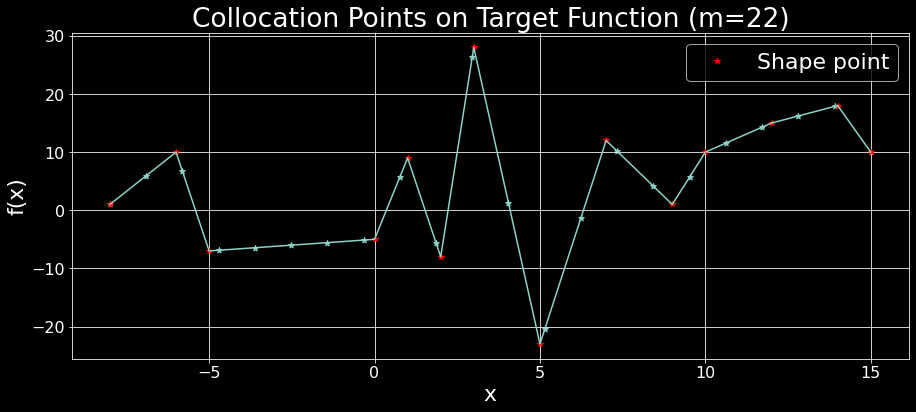

In [4]:
'''Collocation abscissa points'''
m=22
new_x = np.linspace(x_min,x_max,m)
i_p = interp1d(Shape[:,0], Shape[:,1])
new_f= i_p(new_x)
plt.scatter(new_x,new_f, marker = '*')
#plt.step(Shape[:,0], Shape[:,1], where='mid')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label= 'Shape point')
plt.plot(Shape[:,0], Shape[:,1])
plt.legend()
plt.title('Collocation Points on Target Function (m='+str(m)+')')
plt.xlabel('x');plt.ylabel('f(x)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()

In [5]:
'''Build the basis functions collocation matrix and Build target function vector at the collocation points'''
    
def final_matrix(x_pts):
    Z=[]
    for k in range(len(N)):
        zm=WB(x_pts,N[k],x_p[k],shift,sigma_p[k])
        Z.append(zm)
        #print(len(zm))
    ZM=np.concatenate(Z, axis=1)
    return(ZM)

#print(ZM.shape)

#ZM1=WB(new_x,3,-1,0,1)
#ZM2=WB(new_x,2,3,0,0.5)
#ZM3=WB(new_x,3,6,0,0.4)
#ZM4=WB(new_x,6,8,0,0.3)

#print((ZM1))
a_tilde_mtrx=final_matrix(new_x)
print(a_tilde_mtrx.shape)

(22, 17)


In [6]:
'''Compute optimal coefficient vector'''
if a_tilde_mtrx.shape[0] > a_tilde_mtrx.shape[1]:
    print('A is overdetermined.')
elif a_tilde_mtrx.shape[0] < a_tilde_mtrx.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')
    
if matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')
    
############################################################
f_tilde_vec = np.array(new_f)

#print(f_tilde_vec)
if matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(a_tilde_mtrx@c_tilde_star_vec-f_tilde_vec)))
print(c_tilde_star_vec)

A is overdetermined.
A is full rank.
A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 =  1.174e+02
a_ 1 = -2.200e+02
b_ 1 = -1.449e+01
a_ 2 =  6.774e+01
b_ 2 = -2.367e+01
a_ 3 =  1.730e+04
b_ 3 = -3.851e+04
a_ 4 =  1.242e+04
b_ 4 =  3.056e+04
a_ 5 = -1.257e+04
b_ 5 = -9.079e+03
a_ 6 =  2.983e+03
b_ 6 =  2.069e+02
a_ 7 =  2.536e+02
b_ 7 = -5.148e+00
a_ 8 =  6.110e+01
b_ 8 = -7.856e+00

||r^*||_2 =  9.230e+00
[ 1.17433151e+02 -2.19978340e+02 -1.44857848e+01  6.77413823e+01
 -2.36692654e+01  1.73038409e+04 -3.85068067e+04  1.24223693e+04
  3.05572742e+04 -1.25687507e+04 -9.07858081e+03  2.98312664e+03
  2.06900413e+02  2.53566450e+02 -5.14789580e+00  6.11011406e+01
 -7.85553522e+00]


In [7]:
'''Build the best approximant function'''
def g_best_vec_func(x_pts,c_tilde_star_vec):
    a_mtrx = final_matrix(x_pts)
    return a_mtrx@c_tilde_star_vec
n_pts = max(2*m, 100)
x_pts = np.linspace(x_min, x_max, n_pts)

g_best_vec_1 = g_best_vec_func(x_pts,c_tilde_star_vec)

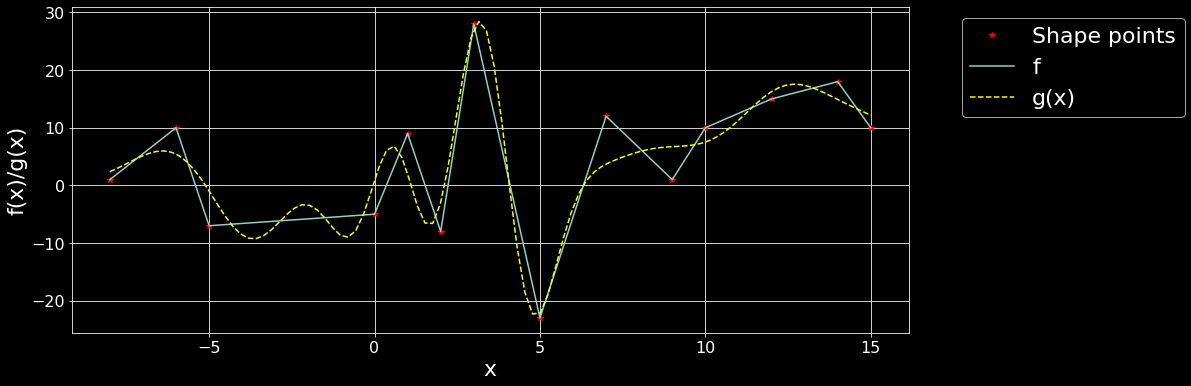

In [8]:
'''Plot comparison of f and g_best_vec'''
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.plot(Shape[:,0], Shape[:,1],label='f')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_1,'--',label='g(x)', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [9]:
'''L2 norm error'''

def f_integrand(x):
    return i_p(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = g_best_vec_func(np.array([x]),c_tilde_star_vec)
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = i_p(np.array([x]))
    g_vec = g_best_vec_func(np.array([x]),c_tilde_star_vec)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 52.11518551335987
quadrature error = 1.5795791140268403e-07

||f-g||_L2 = 15.866083479525667
quadrature error = 3.596669164973339e-06

Relative error =  32.047790 %


<span style="color:blue">**Explanation:**</span> Relative error is very low which is a very good measurment that my guess is good.

### <span style="color:blue">[1.3)](#toa)(10 pts) Plot the residual function and analyze it.
</span><a id="a13"></a>

Positives at collocation pts =  10
Negatives at collocation pts =  12
Positives =  248
Negatives =  252


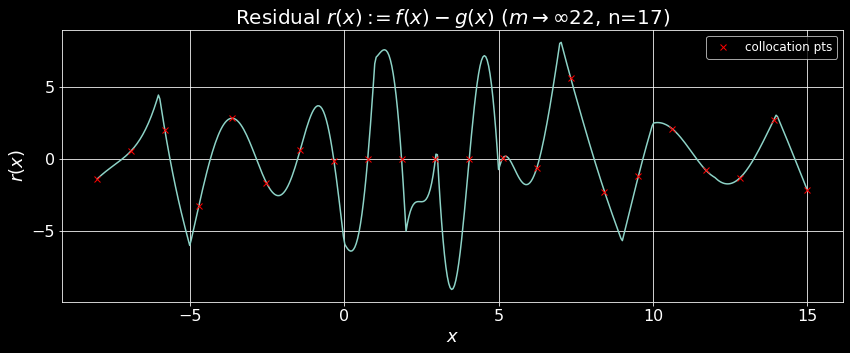

In [10]:
'''Residual of the best approximant'''
n_pts = max(3*m, 500)
x_pts = np.linspace(x_min, x_max, n_pts)

residual = i_p(x_pts) - g_best_vec_func(x_pts,c_tilde_star_vec)
residual_collocation_pts = i_p(new_x) - g_best_vec_func(new_x,c_tilde_star_vec)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
#print(g_best_vec_1) 
plt.figure(1, figsize=(14, 5))
plt.plot(x_pts, residual)
plt.plot(new_x, i_p(new_x)-g_best_vec_func(new_x,c_tilde_star_vec),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(a_tilde_mtrx[0]))+')', fontsize=20)

plt.ylabel(r'$r(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

<span style="color:blue">**Analysis:**</span>
The residue tells us that it is a good guess, because the positiv and negative values are very close( evenly distributed). It indicates the residual is symmetric relative to the abscissa axis. This symmetric neature we can also observed from the residue plot which shows almost equal shoots with respect to '0' on both side.(i.e. symmetric distribution). Beside this the larger values of the residual concentrates in the region of larger jumps on the target function.

### <span style="color:blue">[1.4)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a14"></a>

In [11]:
'''Code for minimum'''

increment = np.random.uniform(0,1,size = len(c_tilde_star_vec))
#print(increment)
norm1=[]

c_tilde_star_vec_new=np.zeros(len(c_tilde_star_vec))

#print(c_tilde_star_vec)
for i in range (50):
    c_tilde_star_vec_new = c_tilde_star_vec+increment*0.1*i
    #print(c_tilde_star_vec_new)
    g_best_vec_i=g_best_vec_func(x_pts,c_tilde_star_vec_new)
    #print(g_best_vec_i)
    resedue = i_p(x_pts)- g_best_vec_func(x_pts,c_tilde_star_vec_new)
    norm1.append(norm((resedue)))
norm2=[]
#print(c_tilde_star_vec)
c_tilde_star_vec_new2=np.zeros(len(c_tilde_star_vec))
#print(c_tilde_star_vec)
for i in range (50):
    c_tilde_star_vec_new2 = c_tilde_star_vec-increment*0.1*i
    #print(c_tilde_star_vec_new)
    g_best_vec_i=g_best_vec_func(x_pts,c_tilde_star_vec_new2)
    #print(g_best_vec_i)
    resedue = i_p(x_pts)- g_best_vec_func(x_pts,c_tilde_star_vec_new2)
    norm2.append(norm((resedue)))
norm_das=norm2[::-1]
#print(norm_das)
norm_das.extend(norm1)

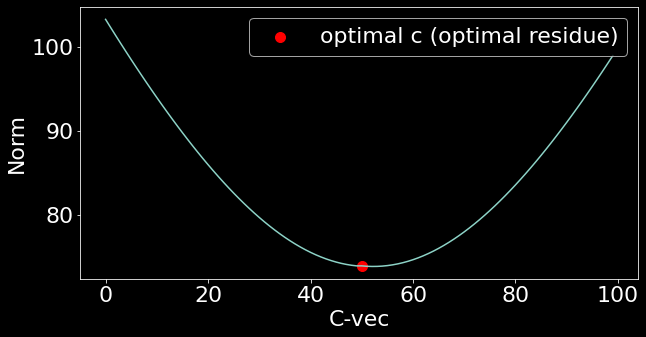

In [12]:

#print((norm1),len(norm2))
plt.plot(norm_das)
plt.xlabel("C-vec")
plt.ylabel("Norm")
plt.scatter(50,min(norm_das),s=100,c='red',label='optimal c (optimal residue)')
plt.legend()
plt.show()

<span style="color:blue">**Explanation:**</span>
I changed the C vectors and then compute the residues again. As i am changing c vectors from optimal value, the residue also changes. And By plotting the norm of the each recidue I have confirmed that my residue is minium.



## <span style="color:blue">[Assignment 2 (40 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(30 pts) Compute "the best" approximant function $g$ using wavelets basis functions with the same parameters as before; use a continuous approximation and compare to the results obtained earlier in 1.2). Does the error decrease? Why or why not?
</span><a id="a21"></a>

In [13]:
'''Build the Gram matrix'''
def g_int(x,p,i,q,j):
    g_it=(basis(x,x_p[p],shift,sigma_p[p],i))*(basis(x,x_p[q],shift,sigma_p[q],j))
    return g_it


gram_mtrx=np.zeros(((np.sum(2*N)+len(N)),(np.sum(2*N)+len(N))))

for p in range(P):
    for i in range(2*N[p]+1):
        for q in range(P):
            for j in range(2*N[q]+1):
                gram_mtrx[int(handel_index(p)+i),int(handel_index(q)+j)] = quad(g_int,x_min,x_max,args=(p,i,q,j),limit=10000)[0]

                                                                                                                                                
print(gram_mtrx.shape)
#gram_mtrx = gram_matrix(a_tilde_mtrx)


if gram_mtrx.shape[0] > gram_mtrx.shape[1]:
    print('G is overdetermined.')
elif gram_mtrx.shape[0] < gram_mtrx.shape[1]:
    print('G is underdetermined.')  
else:
    print('G is determined.')
    
if matrix_rank(gram_mtrx) == min(gram_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

'''Load vector'''
def load(x,p,i):
    load_el=(basis(x,x_p[p],shift,sigma_p[p],i))*i_p(x)
    return load_el

b_vec = np.zeros(((np.sum(2*N)+len(N))))

for p in range(len(N)):
    for i in range(2*N[p]+1):
        b_vec[int(handel_index(p)+i)]= quad(load,x_min,x_max,args=(p,i),limit=1000)[0]
#print(b_vec.shape)       

#print(gram_mtrx,b_vec)

(17, 17)
G is determined.
G is full rank.


<ipython-input-13-5072350dd9fa>:41: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  b_vec[int(handel_index(p)+i)]= quad(load,x_min,x_max,args=(p,i),limit=1000)[0]


In [14]:
'''Compute optimal coefficient vector'''
#print(gram_mtrx,b_vec)

c_star_vec = solve(gram_mtrx, b_vec)
print(c_star_vec,b_vec.shape,(gram_mtrx.shape))
#c_star_vec =np.concatenate(c_star_vec)
print((c_star_vec))

[ 2.79701010e+02 -6.89741598e+02 -2.54928531e+02  3.36721689e+02
  7.70474269e+01 -1.96044937e+04  4.17999323e+04 -1.19642259e+04
 -2.88599823e+04  1.00928064e+04  7.18603468e+03 -2.13757903e+03
  4.03853867e+02  5.29778715e+02 -1.72852175e+00  1.41514653e+02
 -5.15623241e+00] (17,) (17, 17)
[ 2.79701010e+02 -6.89741598e+02 -2.54928531e+02  3.36721689e+02
  7.70474269e+01 -1.96044937e+04  4.17999323e+04 -1.19642259e+04
 -2.88599823e+04  1.00928064e+04  7.18603468e+03 -2.13757903e+03
  4.03853867e+02  5.29778715e+02 -1.72852175e+00  1.41514653e+02
 -5.15623241e+00]


In [15]:
'''Build the best approximant function'''
def g_best_vec_func1(x_pts,c_star_vec):
    a_mtrx = final_matrix(x_pts)
    return a_mtrx@c_star_vec

16.464084701842168


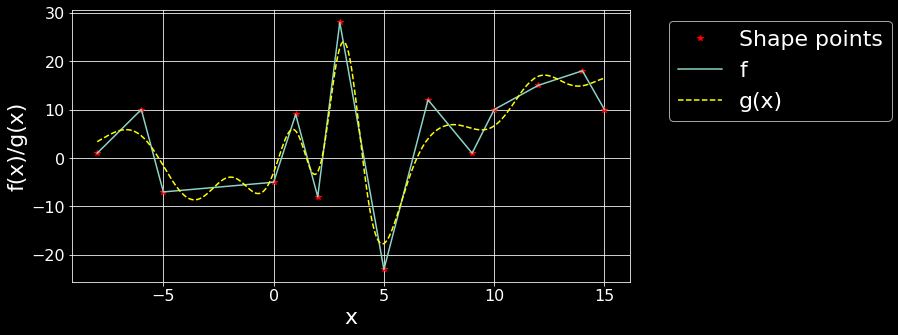

In [16]:
'''Plot comparison of f and g_best_vec'''
n_pts = max(2*m, 350)
x_pts = np.linspace(x_min, x_max, n_pts)
g_best_vec_2 = g_best_vec_func1(x_pts,c_star_vec)
print(g_best_vec_2[-1])



####################################################################################
'''Plot comparison of f and g_best_vec'''

plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.plot(Shape[:,0], Shape[:,1],label='f')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_2,'--',label='g(x)', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [17]:
'''L2 norm error'''

def f_integrand(x):
    return i_p(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = g_best_vec_func1(np.array([x]),c_star_vec)
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = i_p(np.array([x]))
    g_vec = g_best_vec_func1(np.array([x]),c_star_vec)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 48.02674674169492
quadrature error = 2.3455668921675997e-06

||f-g||_L2 = 12.018225617834338
quadrature error = 1.4261308933782857e-06

Relative error =  24.275529 %


Positives =  258
Negatives =  242


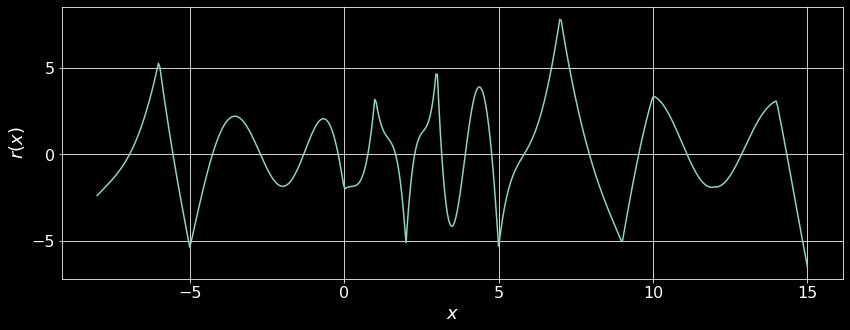

In [18]:
'''Residual of the best approximant'''
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.style.use('dark_background')

n_pts = max(3*m, 500)
x_pts = np.linspace(x_min, x_max, n_pts)
#print(g_best_vec_func1(x_pts))
residual = i_p(x_pts) - g_best_vec_func1(x_pts,c_star_vec)
#print(residual)

print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
  
plt.figure(1, figsize=(14, 5))
plt.plot(x_pts, residual)

#plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$, n='+str(len(wb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$r(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

100


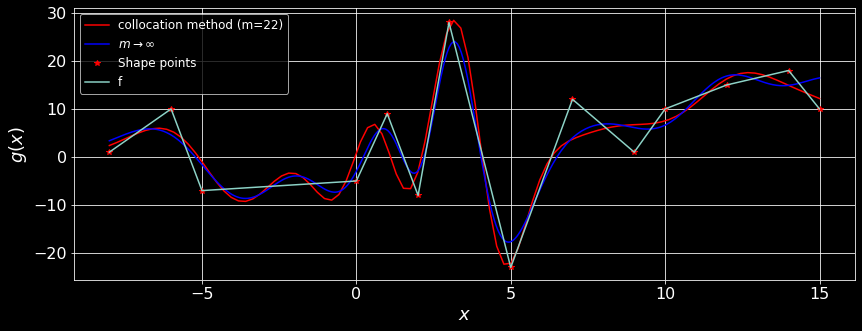

2.3811203769876084 12.16824764278985
3.373844992453882 16.464084701842168


In [19]:
'''Code for comparison to collocation method'''
plt.figure(1, figsize=(14, 5))

#plt.plot(x_pts, new_f,'g-',label='f')
x_pts = np.linspace(x_min, x_max, len(g_best_vec_1))
print(len(x_pts))
plt.plot(x_pts, g_best_vec_1, 'r-', label='collocation method (m='+str(m)+')')
x_pts = np.linspace(x_min, x_max, len(g_best_vec_2))
plt.plot(x_pts, g_best_vec_2, 'b-', label=r'$m\rightarrow \infty$')
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.plot(Shape[:,0], Shape[:,1],label='f')
#plt.plot(x_tilde_pts, f.values(x_tilde_pts),'bx')

#plt.title(r'Collocation versus Collocation-Free Methods (n='+str(len(wb.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$g(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

print(g_best_vec_1[0],g_best_vec_1[-1])
print(g_best_vec_2[0],g_best_vec_2[-1])

<span style="color:blue">**Explanation:**</span> As I go from collocation approximation to continious gram matrix approximation then the error get reduced. this is because by implementig intrgtation we are taking sum over a continious domain, which helps in reducing the error.

### <span style="color:blue">[2.2)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a22"></a>

In [20]:
'''Code for minimum'''
norm1=[]

c_star_vec_new=np.zeros(len(c_star_vec))

for i in range (50):
    c_star_vec_new = c_star_vec+increment*0.1*i
    g_best_vec_i=g_best_vec_func(x_pts,c_star_vec_new)
    resedue = i_p(x_pts)- g_best_vec_func(x_pts,c_star_vec_new)
    norm1.append(norm((resedue)))
norm2=[]

c_star_vec_new2=np.zeros(len(c_star_vec))
for i in range (50):
    c_star_vec_new2 = c_star_vec-increment*0.1*i
    g_best_vec_i=g_best_vec_func(x_pts,c_star_vec_new2)
    resedue = i_p(x_pts)- g_best_vec_func(x_pts,c_star_vec_new2)
    norm2.append(norm((resedue)))
norm_das=norm2[::-1]
norm_das.extend(norm1)

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a2"></a>

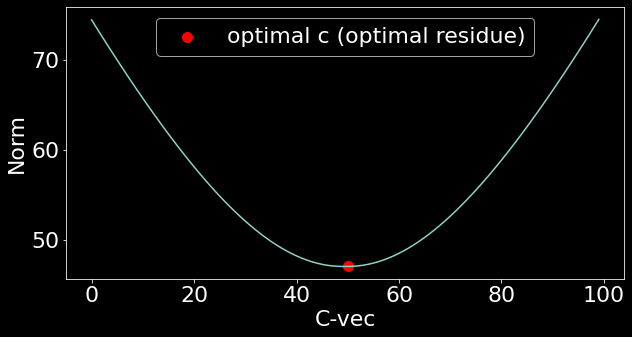

In [21]:
plt.plot(norm_das)
plt.xlabel("C-vec")
plt.ylabel("Norm")
plt.scatter(50,min(norm_das),s=100,c='red',label='optimal c (optimal residue)')
plt.legend()
plt.show()

I changed the C vectors and then compute the residues again. As i am changing c vectors from optimal value, the residue also changes. And By plotting the norm of the each recidue I have confirmed that my residue is minium

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

### <span style="color:blue">**Answer:**</span> 

I found making of gram matrix as the hardest part.